In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from itertools import product

import gc

In [42]:
train_data = pd.read_csv('data/sales_train_v2.csv')
test_data = pd.read_csv('data/test.csv')
categories_data = pd.read_csv('data/item_categories.csv')
items_data = pd.read_csv('data/items.csv')
shops_data = pd.read_csv('data/shops.csv')

In [20]:
print('=====================TRAIN DATA=====================')
print(train_data.head(5))
print('=====================TEST DATA=====================')
print(test_data.head(5))
print('=====================CATEGORIES DATA=====================')
print(categories_data.head(5))
print('=====================ITEMS DATA=====================')
print(items_data.head(5))
print('=====================SHOPS DATA=====================')
print(shops_data.head(5))

=====================TRAIN DATA=====================
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
=====================TEST DATA=====================
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
=====================CATEGORIES DATA=====================
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - P

In [21]:
print(shops_data)

                                          shop_name  shop_id
0                     !Якутск Орджоникидзе, 56 фран        0
1                     !Якутск ТЦ "Центральный" фран        1
2                                  Адыгея ТЦ "Мега"        2
3                    Балашиха ТРК "Октябрь-Киномир"        3
4                          Волжский ТЦ "Волга Молл"        4
5                            Вологда ТРЦ "Мармелад"        5
6                        Воронеж (Плехановская, 13)        6
7                            Воронеж ТРЦ "Максимир"        7
8                      Воронеж ТРЦ Сити-Парк "Град"        8
9                                 Выездная Торговля        9
10                       Жуковский ул. Чкалова 39м?       10
11                       Жуковский ул. Чкалова 39м²       11
12                              Интернет-магазин ЧС       12
13                              Казань ТЦ "Бехетле"       13
14                          Казань ТЦ "ПаркХаус" II       14
15                      

In [35]:
train_data.shop_id = train_data.shop_id.map({0:57, 0:58})

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


### Look for outliers
For good algrithms perfomance it is better to remove outliers.

1. Find outliers in item price
2. Find outliers in item_cnt_day

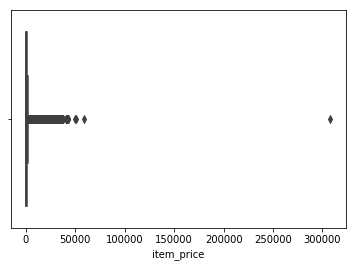

In [4]:
sns.boxplot(x=train_data['item_price'])

It is clear tha we have outlier on price around 300000. Let's check what is it

In [7]:
train_data.sort_values(by=['item_price'], ascending = False).head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0
885138,17.09.2013,8,12,11365,59200.0,1.0
1488135,20.03.2014,14,25,13199,50999.0,1.0
2327159,29.01.2015,24,12,7241,49782.0,1.0
2931380,20.10.2015,33,22,13403,42990.0,1.0
2917760,20.10.2015,33,3,13403,42990.0,1.0
2910156,29.10.2015,33,12,13403,42990.0,1.0
2885692,23.10.2015,33,42,13403,42990.0,1.0
1006638,24.10.2013,9,12,7238,42000.0,1.0
2910155,20.10.2015,33,12,13403,41990.0,1.0


In [8]:
items_data[items_data.item_id == 6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


Shop number 12 sold 522 licenses for some software Radmin3 in one item. Let's check wheather we have this item in the test data

In [9]:
test_data[test_data.item_id == 6066]

,ID,shop_id,item_id


There is no item with id = 6066 in the test data, we can easily remove this point from the obseravation

In [10]:
train_data = train_data[train_data.item_id != 6066]

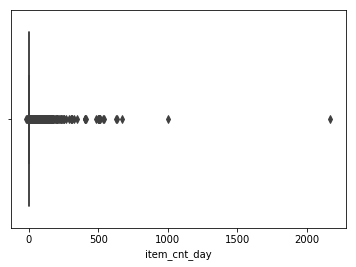

In [11]:
sns.boxplot(x=train_data['item_cnt_day'])

In [12]:
train_data.sort_values(by=['item_cnt_day'], ascending = False).head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,28.10.2015,33,12,11373,0.908714,2169.0
2326930,15.01.2015,24,12,20949,4.000000,1000.0
2864235,30.09.2015,32,12,9248,1692.526158,669.0
2851091,30.09.2015,32,55,9249,1702.825746,637.0
2608040,14.04.2015,27,12,3731,1904.548077,624.0
2626181,19.05.2015,28,12,11373,155.192950,539.0
2851073,29.09.2015,32,55,9249,1500.000000,533.0
2048518,02.10.2014,21,12,9242,1500.000000,512.0
2067669,09.10.2014,21,55,19437,899.000000,508.0
2864260,29.09.2015,32,12,9248,1500.000000,504.0


In [13]:
train_data.at[2909818, 'item_cnt_day'] = train_data[train_data.item_id == 11373].item_cnt_day.mean()
train_data.at[2326930, 'item_cnt_day'] = train_data[train_data.item_id == 20949].item_cnt_day.mean()

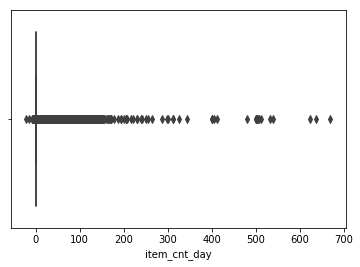

In [14]:
sns.boxplot(x=train_data['item_cnt_day'])

In [15]:
train_data.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [16]:
train_data.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [17]:
train_data.drop(columns=['date'], inplace = True)
train_data.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,59,22154,999.00,1.0
1,0,25,2552,899.00,1.0
2,0,25,2552,899.00,-1.0
3,0,25,2554,1709.05,1.0
4,0,25,2555,1099.00,1.0


In [18]:
aggregation_functions = {'item_cnt_day': 'sum', 'item_price': 'mean'}
train_data_new = train_data.groupby(['date_block_num', 'shop_id', 'item_id']).aggregate(aggregation_functions).reset_index()
train_data_new.rename(index=str, columns={"item_cnt_day": "item_cnt_month"}, inplace = True)
train_data_new.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price
0,0,0,32,6.0,221.0
1,0,0,33,3.0,347.0
2,0,0,35,1.0,247.0
3,0,0,43,1.0,221.0
4,0,0,51,2.0,128.5


In [19]:
shop_ids = train_data_new['shop_id'].unique()
item_ids = train_data_new['item_id'].unique()
empty_df = []
for i in range(35):
    for shop in shop_ids:
        for item in item_ids:
            empty_df.append([i, shop, item])
    
empty_df = pd.DataFrame(empty_df, columns=['date_block_num','shop_id','item_id'])

In [20]:
train_monthly = pd.merge(empty_df, train_data_new, on=['date_block_num','shop_id','item_id'], how='left')

In [21]:
train_monthly.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price
0,0,0,32,6.0,221.0
1,0,0,33,3.0,347.0
2,0,0,35,1.0,247.0
3,0,0,43,1.0,221.0
4,0,0,51,2.0,128.5


In [45]:
test_data['date_block_num'] = 34
test_data.head()
new_test = test_data[['date_block_num', 'shop_id', 'item_id']]
train_monthly.append(new_test)

,date,date_block_num,item_cnt_day,item_id,item_price,shop_id
0,02.01.2013,0,1.0,22154,999.00,59
1,03.01.2013,0,1.0,2552,899.00,25
2,05.01.2013,0,-1.0,2552,899.00,25
3,06.01.2013,0,1.0,2554,1709.05,25
4,15.01.2013,0,1.0,2555,1099.00,25
5,10.01.2013,0,1.0,2564,349.00,25
6,02.01.2013,0,1.0,2565,549.00,25
7,04.01.2013,0,1.0,2572,239.00,25
8,11.01.2013,0,1.0,2572,299.00,25
9,03.01.2013,0,3.0,2573,299.00,25


In [22]:
del empty_df
del train_data_new
del train_data

In [23]:
train_monthly.isna().sum()

date_block_num           0
shop_id                  0
item_id                  0
item_cnt_month    44183477
item_price        44183477
dtype: int64

In [24]:
train_monthly.item_price = train_monthly.groupby(['shop_id', 'item_id'])['item_price'].apply(lambda x: x.fillna(x.mean()))
train_monthly.isna().sum()

date_block_num           0
shop_id                  0
item_id                  0
item_cnt_month    44183477
item_price        30948295
dtype: int64

In [ ]:
train_monthly.item_price = train_monthly.groupby(['item_id'])['item_price'].apply(lambda x: x.fillna(x.mean()))
train_monthly.isna().sum()

In [25]:
train_monthly.fillna(0, inplace=True)
train_monthly.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price
0,0,0,32,6.0,221.0
1,0,0,33,3.0,347.0
2,0,0,35,1.0,247.0
3,0,0,43,1.0,221.0
4,0,0,51,2.0,128.5


In [26]:
train_monthly.isna().sum()

date_block_num    0
shop_id           0
item_id           0
item_cnt_month    0
item_price        0
dtype: int64

In [27]:
train_monthly['date_block_num'] = train_monthly['date_block_num'].astype(np.int8)
train_monthly['shop_id'] = train_monthly['shop_id'].astype(np.int8)
train_monthly['item_id'] = train_monthly['item_id'].astype(np.int16)
train_monthly['item_cnt_month'] = train_monthly['item_cnt_month'].astype(np.int16)
train_monthly['item_price'] = train_monthly['item_price'].astype(np.float32)
train_monthly.dtypes

date_block_num       int8
shop_id              int8
item_id             int16
item_cnt_month      int16
item_price        float32
dtype: object

In [28]:
def add_shift(data, shifts):
    for shift in shifts:
        data[f'item_cnt_prev_{shift}'] = data.groupby(['shop_id', 'item_id'])['item_cnt_month'].shift(shift).astype(np.float16)
    data = data.fillna(0)
    return data

In [29]:
shifts = [1, 2, 3, 6, 12]
train_monthly = add_shift(train_monthly, shifts)

In [30]:
train_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45792600 entries, 0 to 45792599
Data columns (total 10 columns):
date_block_num      int8
shop_id             int8
item_id             int16
item_cnt_month      int16
item_price          float32
item_cnt_prev_1     float16
item_cnt_prev_2     float16
item_cnt_prev_3     float16
item_cnt_prev_6     float16
item_cnt_prev_12    float16
dtypes: float16(5), float32(1), int16(2), int8(2)
memory usage: 1.2 GB


In [31]:
def sum_sales(data, months):
    data_temp = pd.DataFrame()
    for shift in range(max(months)):
        data_temp[f'temp_shift_{shift}'] = data.groupby(['shop_id', 'item_id'])['item_cnt_month'].shift(shift + 1).astype(np.float16) 
    data_temp = data_temp.fillna(0)
    for month in months:        
        data[f'item_cnt_month_{month}'] = data_temp.iloc[:,0:month].sum(axis = 1).astype(np.int16)      
    return data

In [32]:
months = [1, 2, 3, 6, 12]
train_monthly = sum_sales(train_monthly, months)
train_monthly.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_cnt_prev_1,item_cnt_prev_2,item_cnt_prev_3,item_cnt_prev_6,item_cnt_prev_12,item_cnt_month_1,item_cnt_month_2,item_cnt_month_3,item_cnt_month_6,item_cnt_month_12
0,0,0,32,6,221.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,0,0,33,3,347.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,0,0,35,1,247.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,0,0,43,1,221.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,0,0,51,2,128.5,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [33]:
train_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45792600 entries, 0 to 45792599
Data columns (total 15 columns):
date_block_num       int8
shop_id              int8
item_id              int16
item_cnt_month       int16
item_price           float32
item_cnt_prev_1      float16
item_cnt_prev_2      float16
item_cnt_prev_3      float16
item_cnt_prev_6      float16
item_cnt_prev_12     float16
item_cnt_month_1     int16
item_cnt_month_2     int16
item_cnt_month_3     int16
item_cnt_month_6     int16
item_cnt_month_12    int16
dtypes: float16(5), float32(1), int16(7), int8(2)
memory usage: 1.6 GB


In [34]:
shops_data['city_code'] = pd.Categorical(shops_data.shop_name.apply(lambda x: x.split(' ')[0]).apply(lambda x: str.replace(x, "!", ''))).codes.astype(np.int16)

In [35]:
train_monthly = pd.merge(train_monthly, shops_data[['shop_id', 'city_code']],  how = 'left', on='shop_id')

In [36]:
categories_data['gen_category_id'] = pd.Categorical(categories_data.item_category_name.apply(lambda x: x.split(' ')[0])).codes.astype(np.int16)
items_data = pd.merge(items_data, categories_data[['item_category_id', 'gen_category_id']],  how = 'left', on='item_category_id')
items_data.head(10)

,item_name,item_id,item_category_id,gen_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,7
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,11
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,7
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,7
4,***КОРОБКА (СТЕКЛО) D,4,40,7
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,7
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40,7
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40,7
8,***ЧАЙ С МУССОЛИНИ D,8,40,7
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40,7


In [37]:
train_monthly = pd.merge(train_monthly, items_data[['item_id', 'gen_category_id']],  how = 'left', on='item_id')
train_monthly.head(10)

,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_cnt_prev_1,item_cnt_prev_2,item_cnt_prev_3,item_cnt_prev_6,item_cnt_prev_12,item_cnt_month_1,item_cnt_month_2,item_cnt_month_3,item_cnt_month_6,item_cnt_month_12,city_code,gen_category_id
0,0,0,32,6,221.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7
1,0,0,33,3,347.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7
2,0,0,35,1,247.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7
3,0,0,43,1,221.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7
4,0,0,51,2,128.5,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,9
5,0,0,61,1,195.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,8
6,0,0,75,1,76.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7
7,0,0,88,1,76.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7
8,0,0,95,1,193.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7
9,0,0,96,1,70.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7


In [38]:
cols = list(train_monthly.columns.values)
cols

['date_block_num',
 'shop_id',
 'item_id',
 'item_cnt_month',
 'item_price',
 'item_cnt_prev_1',
 'item_cnt_prev_2',
 'item_cnt_prev_3',
 'item_cnt_prev_6',
 'item_cnt_prev_12',
 'item_cnt_month_1',
 'item_cnt_month_2',
 'item_cnt_month_3',
 'item_cnt_month_6',
 'item_cnt_month_12',
 'city_code',
 'gen_category_id']

In [149]:
#train_df = train_base[['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_month', 'city_code', 'gen_category_id']].copy()

In [99]:
#train_df = train_df.drop(['average_category_price'], axis=1, inplace = True)

In [39]:
train_monthly['average_category_price'] = train_monthly['gen_category_id'].map(train_monthly.groupby('gen_category_id')['item_price'].mean().astype(np.float32).to_dict())
train_monthly.head(10)

,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_cnt_prev_1,item_cnt_prev_2,item_cnt_prev_3,item_cnt_prev_6,item_cnt_prev_12,item_cnt_month_1,item_cnt_month_2,item_cnt_month_3,item_cnt_month_6,item_cnt_month_12,city_code,gen_category_id,average_category_price
0,0,0,32,6,221.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7,134.694504
1,0,0,33,3,347.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7,134.694504
2,0,0,35,1,247.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7,134.694504
3,0,0,43,1,221.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7,134.694504
4,0,0,51,2,128.5,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,9,135.523819
5,0,0,61,1,195.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,8,68.394485
6,0,0,75,1,76.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7,134.694504
7,0,0,88,1,76.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7,134.694504
8,0,0,95,1,193.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7,134.694504
9,0,0,96,1,70.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7,134.694504


In [40]:
holidays = {0: 6, 1: 0, 2: 1, 3: 0, 4: 5, 5: 1, 6: 0, 7: 0, 8: 0, 9:0, 10: 1, 11: 0}
holidays

{0: 6, 1: 0, 2: 1, 3: 0, 4: 5, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0, 10: 1, 11: 0}

In [41]:
train_monthly['month'] = train_monthly['date_block_num'].apply(lambda x: x%12).astype(np.int16)
train_monthly['holidays'] = train_monthly['month'].map(holidays).astype(np.int16)

In [47]:
train_monthly.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_cnt_prev_1,item_cnt_prev_2,item_cnt_prev_3,item_cnt_prev_6,item_cnt_prev_12,item_cnt_month_1,item_cnt_month_2,item_cnt_month_3,item_cnt_month_6,item_cnt_month_12,city_code,gen_category_id,average_category_price,month,holidays
0,0,0,32,6,221.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7,134.694504,0,6
1,0,0,33,3,347.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7,134.694504,0,6
2,0,0,35,1,247.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7,134.694504,0,6
3,0,0,43,1,221.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,7,134.694504,0,6
4,0,0,51,2,128.5,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,29,9,135.523819,0,6


In [64]:
gc.collect()

In [42]:
train_monthly['item_price'] = train_monthly['item_price'].astype(np.float16)
train_monthly['item_cnt_prev_1'] = train_monthly['item_cnt_prev_1'].astype(np.int16)
train_monthly['item_cnt_prev_2'] = train_monthly['item_cnt_prev_2'].astype(np.int16)
train_monthly['item_cnt_prev_3'] = train_monthly['item_cnt_prev_3'].astype(np.int16)
train_monthly['item_cnt_prev_6'] = train_monthly['item_cnt_prev_6'].astype(np.int16)
train_monthly['item_cnt_prev_12'] = train_monthly['item_cnt_prev_12'].astype(np.int16)
train_monthly['average_category_price'] = train_monthly['average_category_price'].astype(np.float16)
train_monthly['city_code'] = train_monthly['city_code'].astype(np.int8)
train_monthly['gen_category_id'] = train_monthly['gen_category_id'].astype(np.int8)
train_monthly['month'] = train_monthly['month'].astype(np.int8)
train_monthly['holidays'] = train_monthly['holidays'].astype(np.int8)
train_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45792600 entries, 0 to 45792599
Data columns (total 20 columns):
date_block_num            int8
shop_id                   int8
item_id                   int16
item_cnt_month            int16
item_price                float16
item_cnt_prev_1           int16
item_cnt_prev_2           int16
item_cnt_prev_3           int16
item_cnt_prev_6           int16
item_cnt_prev_12          int16
item_cnt_month_1          int16
item_cnt_month_2          int16
item_cnt_month_3          int16
item_cnt_month_6          int16
item_cnt_month_12         int16
city_code                 int8
gen_category_id           int8
average_category_price    float16
month                     int8
holidays                  int8
dtypes: float16(2), int16(12), int8(6)
memory usage: 1.8 GB


In [43]:
train_monthly = train_monthly[train_monthly.date_block_num > 11]
train_monthly.to_pickle('data.pkl')

In [61]:
X_train = train_monthly[(train_monthly.date_block_num < 33) & (train_monthly.date_block_num > 11)].drop(['item_cnt_month'], axis=1)
Y_train = train_monthly[(train_monthly.date_block_num < 33) & (train_monthly.date_block_num > 11)]['item_cnt_month']
X_valid = train_monthly[train_monthly.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = train_monthly[train_monthly.date_block_num == 33]['item_cnt_month']
#X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)


In [66]:
from xgboost import XGBRegressor

model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

MemoryError: 